## Task : Create a model using Naive Bayes Classifier to predict whether the Tennis Match wil happen or not based on the weather conditions.

### Step 1: Import Required Libraries

In [209]:
import pandas as pd #For data manipulation.
import numpy as np  # For numerical operations.
from sklearn.preprocessing import LabelEncoder #Converts categorical data (e.g., "Sunny", "Rain") into numerical labels (0, 1, 2).
from sklearn.naive_bayes import CategoricalNB  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt 

### Step 2: Load and Explore the Dataset

In [210]:
# Load dataset
data_source = '/Users/macbookair/CSE-4.2/Machine Learning/Lab/Datasets/tennis_anyone.csv'
df = pd.read_csv(data_source)
df.columns = ['outlook', 'temp', 'humidity', 'wind', 'class']  # Rename columns

# Display first 5 rows
print("Dataset Preview:")
print(df.head())

# Check class distribution
print("\nClass Distribution:")
print(df['class'].value_counts())

Dataset Preview:
    outlook  temp humidity    wind class
0     Sunny   Hot     High    Weak    No
1     Sunny   Hot     High  Strong    No
2  Overcast   Hot     High    Weak   Yes
3      Rain  Mild     High    Weak   Yes
4      Rain  Cool   Normal    Weak   Yes

Class Distribution:
class
Yes    9
No     5
Name: count, dtype: int64


### Step 3: Preprocess Data (Convert Categorical to Numerical)

In [211]:
# Initialize LabelEncoders for each column
label_encoders = {}

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])  # Convert text to numbers
    label_encoders[column] = le  # Store encoders for later use

# Display encoded data
print("\nEncoded Dataset:")
print(df.head())


Encoded Dataset:
   outlook  temp  humidity  wind  class
0        2     1         0     1      0
1        2     1         0     0      0
2        0     1         0     1      1
3        1     2         0     1      1
4        1     0         1     1      1


LabelEncoder() converts:

"Sunny" → 0, "Overcast" → 1, "Rain" → 2

"Hot" → 0, "Mild" → 1, "Cool" → 2

"High" → 0, "Normal" → 1

"Weak" → 0, "Strong" → 1

"No" → 0, "Yes" → 1

label_encoders stores the mappings to decode predictions later.

### Step 4: Split Data into Training & Testing Sets

In [212]:
# Features (X) and Target (y)
X = df.drop(columns=['class'])  # All columns except 'class'
y = df['class']  # Only 'class' column

# Split into 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42  # Ensures reproducibility
)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (9, 4)
Testing set size: (5, 4)


### Step 5: Train the Naive Bayes Model

In [213]:
# Initialize and train the model
nb_classifier = CategoricalNB(alpha=0.1)
nb_classifier.fit(X_train, y_train)

train_accuracy = nb_classifier.score(X_train, y_train)

print(f"\nModel trained successfully!")
print(f"Training Accuracy: {train_accuracy:.4f}")



Model trained successfully!
Training Accuracy: 0.8889


### Step 6: Evaluate Model Performance


Test Accuracy: 0.80


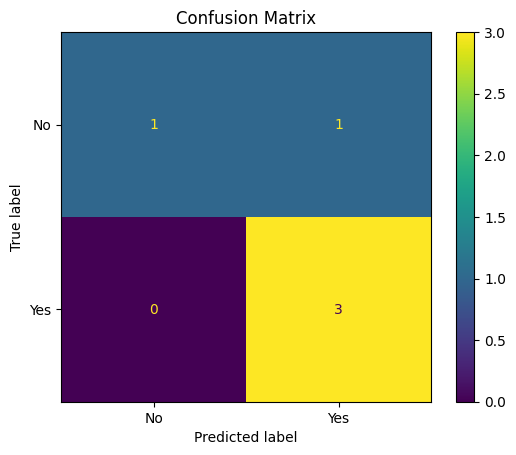

In [214]:
# Predict on test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, 
    display_labels=label_encoders['class'].classes_
)
disp.plot()
plt.title("Confusion Matrix")
plt.show()



### Step 7: Make Predictions on New Data

In [215]:
def predict_match(outlook, temp, humidity, wind):
    # Convert input to DataFrame
    input_data = pd.DataFrame({
        'outlook': [outlook],
        'temp': [temp],
        'humidity': [humidity],
        'wind': [wind]
    })
    
    # Encode input using stored LabelEncoders
    for column in input_data.columns:
        le = label_encoders[column]
        input_data[column] = le.transform(input_data[column])
    
    # Predict and decode result
    prediction = nb_classifier.predict(input_data)
    return label_encoders['class'].inverse_transform(prediction)[0]

# Test Case 1: Sunny, Cool, High, Strong
print("\nPrediction for [Sunny, Cool, High, Strong]:")
print(predict_match('Sunny', 'Cool', 'High', 'Strong'))



Prediction for [Sunny, Cool, High, Strong]:
Yes


### Step 8: Interpret Feature Importance

In [216]:
print("\nFinal Correct Feature Importance Analysis")

# Get the actual structure from the model
print("Number of classes:", len(nb_classifier.feature_log_prob_))

# Create mapping of feature names to their categories
feature_categories = {
    'outlook': ['Sunny', 'Overcast', 'Rain'],
    'temp': ['Hot', 'Mild', 'Cool'],
    'humidity': ['High', 'Normal'],
    'wind': ['Weak', 'Strong']
}

# Analyze feature importance per class
for class_idx, class_name in enumerate(class_names):
    print(f"\n=== Feature Importance for Class: {class_name} ===")
    class_probs = nb_classifier.feature_log_prob_[class_idx]
    
    for feature_idx, feature in enumerate(feature_names):
        # Safely get probabilities for this feature
        try:
            feature_probs = np.exp(class_probs[feature_idx])
            n_categories = len(feature_categories[feature])
            
            print(f"\n{feature} (expected {n_categories} categories):")
            for cat_idx in range(n_categories):
                if cat_idx < len(feature_probs):  # Ensure we don't exceed available probabilities
                    cat_name = feature_categories[feature][cat_idx]
                    prob = feature_probs[cat_idx] if cat_idx < len(feature_probs) else 0.0
                    print(f"  P({feature}={cat_name}|{class_name}): {prob:.4f}")
                else:
                    print(f"  P({feature}=[missing category {cat_idx}]|{class_name}): 0.0")
        except IndexError:
            print(f"\n{feature}: Probability data not available")


Final Correct Feature Importance Analysis
Number of classes: 4

=== Feature Importance for Class: No ===

outlook (expected 3 categories):
  P(outlook=Sunny|No): 0.0303
  P(outlook=Overcast|No): 0.3333
  P(outlook=Rain|No): 0.6364

temp (expected 3 categories):
  P(temp=Hot|No): 0.3333
  P(temp=Mild|No): 0.3333
  P(temp=Cool|No): 0.3333

humidity: Probability data not available

wind: Probability data not available

=== Feature Importance for Class: Yes ===

outlook (expected 3 categories):
  P(outlook=Sunny|Yes): 0.0303
  P(outlook=Overcast|Yes): 0.3333
  P(outlook=Rain|Yes): 0.6364

temp (expected 3 categories):
  P(temp=Hot|Yes): 0.4921
  P(temp=Mild|Yes): 0.1746
  P(temp=Cool|Yes): 0.3333

humidity: Probability data not available

wind: Probability data not available
